#**Decision Trees**

## Introduction
In this assignment, we explore the use of Decision Tree classifiers, a fundamental machine learning model used for classification tasks. Decision Trees help in making sequential, hierarchical decisions about the outcomes based on the features provided. We use the Breast Cancer dataset from the sklearn.datasets module, aiming to predict whether a tumor is malignant or benign based on several medical features.


### Step 1: Loading the Dataset

The first step in working with any machine learning model is loading the dataset.

In [2]:
# Load the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### Step 2: Splitting the Data into Training and Test Sets
To evaluate the performance of our decision tree model, we need to split our dataset into a training set and a test set. We use the train_test_split function from sklearn.model_selection, ensuring that the split is stratified based on the target variable to maintain the ratio of classes in both training and test sets.

In [3]:
# Splitting the dataset into training and test sets, stratifying to maintain class balance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)


Now, The dataset is split into training and test sets to evaluate the performance of the model. Stratification ensures that both sets reflect the overall distribution of the classes in the original dataset, providing a balanced view and preventing biased model training.


### Step 3: Building the Decision Tree Model
Initially, we'll build the decision tree without any restrictions on its depth, allowing it to grow fully. This usually leads to overfitting, where the model performs perfectly on the training data but poorly on unseen test data.

In [4]:
# Building the decision tree without pre-pruning

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

### Step 4: Evaluating the Model
Let's evaluate the model by checking its accuracy on both the training and test datasets.

In [5]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


The initial model, built without any constraints, tends to overfit as it perfectly memorizes the training data. This results in a 100% accuracy on the training set but may perform poorly on unseen data, as indicated by the lower test set accuracy.

### Step 5: Applying Pre-pruning to the Tree
To prevent overfitting, we limit the depth of the tree using the max_depth parameter. This type of constraint is known as pre-pruning.

In [6]:
# Applying pre-pruning by setting max_depth=4
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

By limiting the depth of the tree to four, we introduce pre-pruning, which helps in reducing overfitting. This change aims to improve the model's generalization to new data, as reflected by the test set accuracy.


### Step 6: Re-evaluating the Model


In [7]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.951


After applying pre-pruning, we observed an improved generalization to new data

### Step 7: Visualizing the Decision Tree
Visualizing the tree helps to understand how decisions are being made. We'll use export_graphviz from sklearn.tree to export the tree visualization as a .dot file and then render it.

In [8]:
# Install the graphviz system library
!apt-get install graphviz -y

# Install the graphviz Python package
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


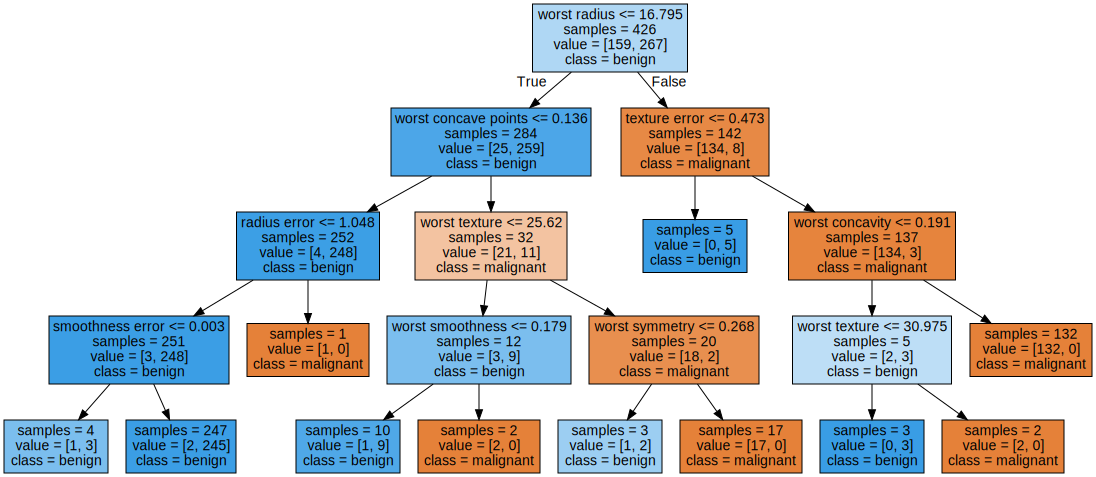

In [9]:
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source
from IPython.display import display

# Assuming 'tree' is your trained DecisionTreeClassifier model and 'cancer' is your dataset
dot_data = export_graphviz(tree, out_file=None, # Set out_file to None to get the data as a string
                           class_names=["malignant", "benign"],
                           feature_names=cancer.feature_names, impurity=False, filled=True)

graph = Source(dot_data)
display(graph)


###Step 8: Analyzing Feature Importance in Trees
Feature importance provides insights into which features are most effective at predicting the target variable.

In [10]:
print("Feature importances:\n{}".format(tree.feature_importances_))


Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


To make this information more accessible, we can visualize the feature importances

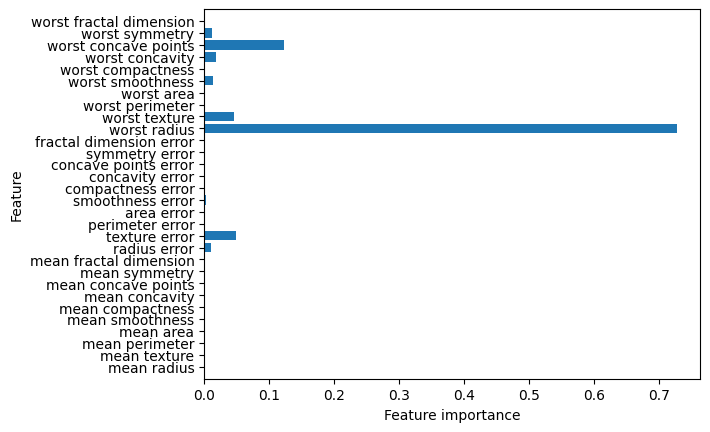

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importances_cancer(tree)


### Understanding Feature Importances in Decision Trees

The feature "worst radius" is identified as highly significant, indicating its critical role in the top split of the tree and suggesting its strong influence in classifying the data into malignant or benign categories. However, a high importance value does not reveal whether a larger or smaller "worst radius" is associated with a sample being benign or malignant. It simply highlights that this feature is crucial for the model’s decision-making process.

Moreover, a feature having a low importance does not mean it is uninformative; it may be that another feature offers similar information and is preferred by the model in splits. This highlights the model's tendency to choose between correlated features based on which one provides the most gain in purity.

Let's visualize and explore these concepts further with the following decision tree analysis:


In [13]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.8 MB/s eta 0:00:00


In [14]:
import mglearn
import matplotlib.pyplot as plt

Feature importances: [0. 1.]


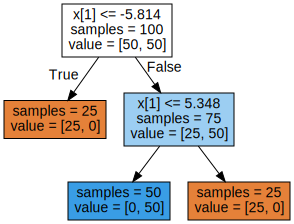

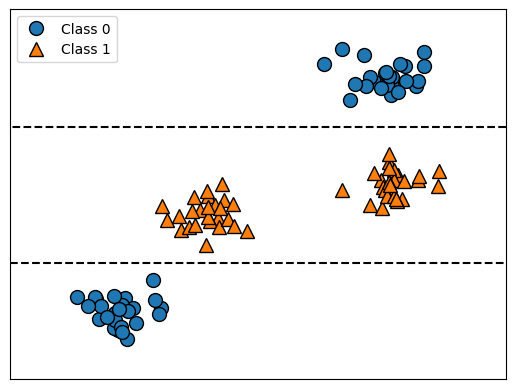

In [15]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)
